<a href="https://colab.research.google.com/github/ricardopaivamelo/FarmTech_na_era_da_cloud_computing/blob/main/RicardoDePaivaMelo_rm565522_pbl_fase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega 1: Análise FarmTech Solutions

## Projeto de Inteligência Artificial para Otimização Agrícola

Este notebook apresenta uma análise completa do dataset `crop_yield.csv` contendo informações históricas sobre condições de solo, clima, tipo de cultura e rendimento das safras.

### Objetivos do Projeto:
1. Realizar análise exploratória completa,
2. Identificar tendências e outliers através de clusterização,
3. Construir 5 modelos preditivos de regressão,
4. Avaliar e comparar os modelos para determinar o melhor desempenho

## ETAPA 1: SETUP E ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

In [2]:
# Importação de todas as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Bibliotecas do scikit-learn para pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algoritmos de clusterização
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Modelos de regressão
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Métricas de avaliação
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurações visuais
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
warnings.filterwarnings('ignore')

print('Todas as bibliotecas foram importadas com sucesso!')

Todas as bibliotecas foram importadas com sucesso!


In [4]:
df = pd.read_csv('crop_yield.csv')
print("Arquivo 'crop_yield.csv' carregado com sucesso!")

Arquivo 'crop_yield.csv' carregado com sucesso!


In [5]:
df.columns = ['Crop', 'Precipitation', 'Specific_Humidity', 'Relative_Humidity', 'Temperature', 'Yield']

In [6]:
print("\n--- Análise Estrutural do Dataset ---")

# Exibindo as 5 primeiras linhas para entender a estrutura
print("\nVisualização das primeiras linhas:")
print(df.head())

# Verificando os tipos de dados de cada coluna e a presença de valores nulos
print("\nInformações gerais (tipos de dados e valores nulos):")
df.info()

# Gerando estatísticas descritivas para as colunas numéricas (média, desvio padrão, etc.)
print("\nEstatísticas descritivas das variáveis numéricas:")
print(df.describe())


--- Análise Estrutural do Dataset ---

Visualização das primeiras linhas:
           Crop  Precipitation  Specific_Humidity  Relative_Humidity  \
0  Cocoa, beans        2248.92              17.72              83.40   
1  Cocoa, beans        1938.42              17.54              82.11   
2  Cocoa, beans        2301.54              17.81              82.79   
3  Cocoa, beans        2592.35              17.61              85.07   
4  Cocoa, beans        2344.72              17.61              84.12   

   Temperature  Yield  
0        26.01  11560  
1        26.11  11253  
2        26.24   9456  
3        25.56   9321  
4        25.76   8800  

Informações gerais (tipos de dados e valores nulos):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               156 non-null    object 
 1   Precipitation      156 non-null    float6


### Análise da Estrutura do Dataset

Com base na inspeção inicial, podemos observar:

  - **Estrutura**: O dataset possui 156 registros e 6 colunas (1 categórica e 5 numéricas)
  - **Dados Faltantes**: Não há valores nulos em nenhuma coluna, o que é excelente para nossa análise
  - **Variável Categórica**: A coluna 'Crop' contém os tipos de cultura
  - **Variáveis Numéricas**:
    - Precipitação varia de aproximadamente 1934 a 3085 mm/dia
    - Umidade específica varia entre 17,5 e 18,7 g/kg
    - Umidade relativa fica entre 82% e 86%
    - Temperatura varia de 25,5°C a 26,8°C
    - Rendimento (Yield) apresenta grande variação, de 5249 a 203399 toneladas/hectare

  As escalas das variáveis são bastante diferentes, o que indica a necessidade de normalização para algoritmos sensíveis a escala.

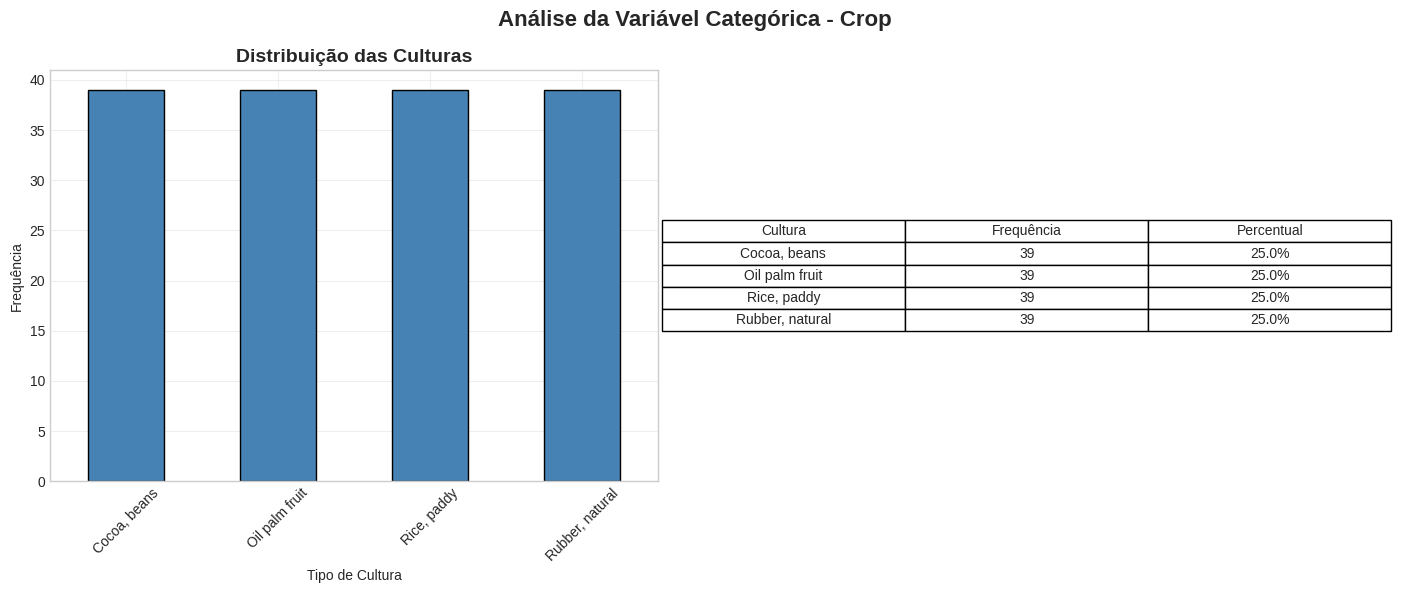

Resumo da distribuição das culturas:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64


In [8]:
# Análise da variável categórica 'Crop'
crop_counts = df['Crop'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
crop_counts.plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribuição das Culturas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Tipo de Cultura')
ax1.set_ylabel('Frequência')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Tabela de frequências
ax2.axis('tight')
ax2.axis('off')
table_data = [[cultura, count, f'{count/len(df)*100:.1f}%']
              for cultura, count in crop_counts.items()]
table = ax2.table(cellText=table_data,
                  colLabels=['Cultura', 'Frequência', 'Percentual'],
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)

plt.suptitle('Análise da Variável Categórica - Crop', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print('Resumo da distribuição das culturas:')
print(crop_counts)

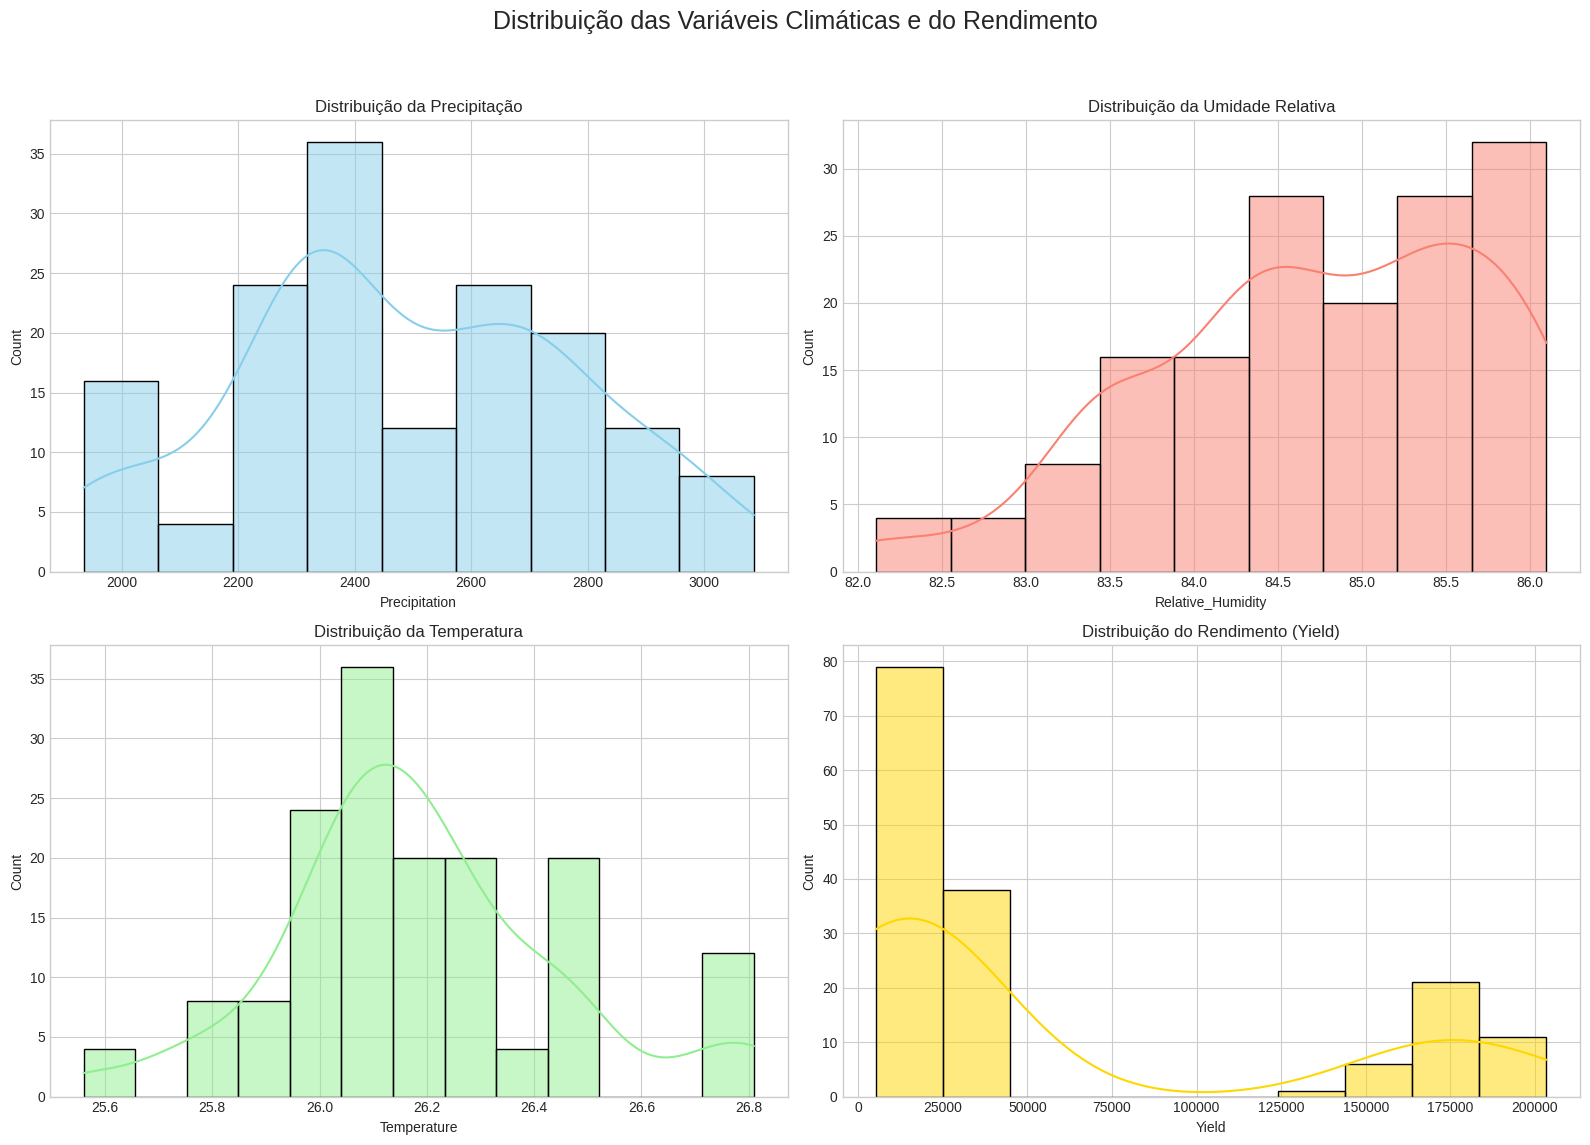

In [9]:
# Análise das variáveis numéricas: Histogramas para ver a distribuição
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição das Variáveis Climáticas e do Rendimento', fontsize=18)

sns.histplot(df['Precipitation'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribuição da Precipitação')

sns.histplot(df['Relative_Humidity'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribuição da Umidade Relativa')

sns.histplot(df['Temperature'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribuição da Temperatura')

sns.histplot(df['Yield'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribuição do Rendimento (Yield)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

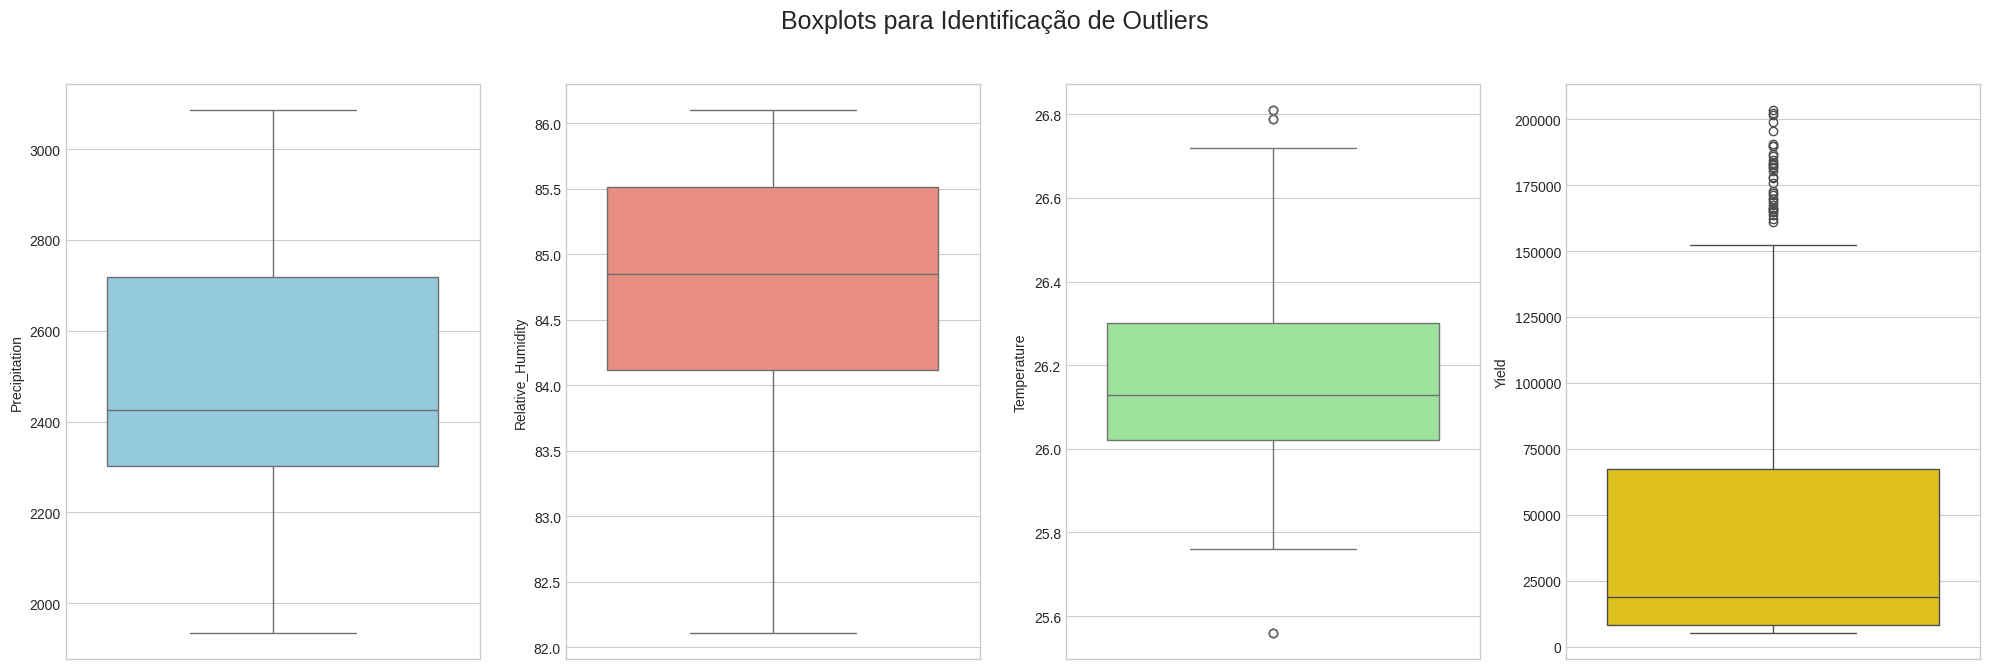

In [10]:
# Análise de outliers com Boxplots
fig, axes = plt.subplots(1, 4, figsize=(20, 7))
fig.suptitle('Boxplots para Identificação de Outliers', fontsize=18)
sns.boxplot(y=df['Precipitation'], ax=axes[0], color='skyblue')
sns.boxplot(y=df['Relative_Humidity'], ax=axes[1], color='salmon')
sns.boxplot(y=df['Temperature'], ax=axes[2], color='lightgreen')
sns.boxplot(y=df['Yield'], ax=axes[3], color='gold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

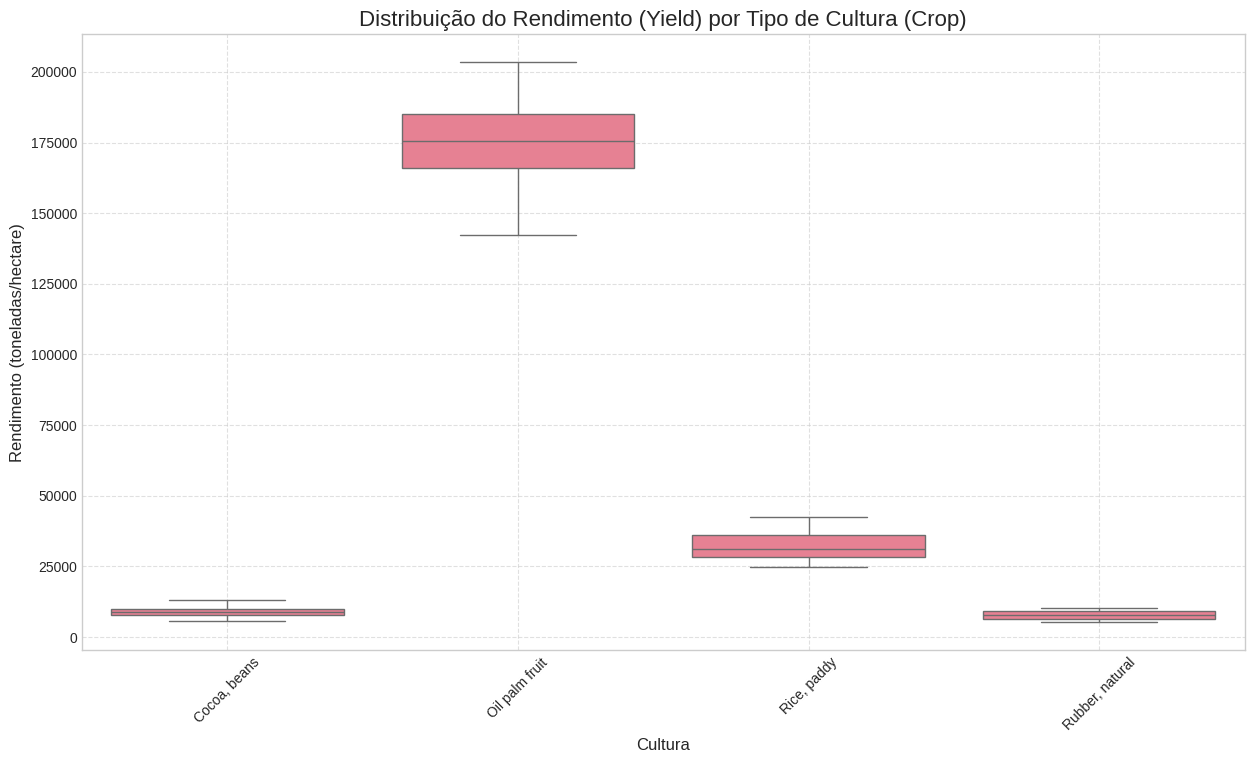

In [12]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.title('Distribuição do Rendimento (Yield) por Tipo de Cultura (Crop)', fontsize=16)
plt.xlabel('Cultura', fontsize=12)
plt.ylabel('Rendimento (toneladas/hectare)', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os nomes das culturas para melhor visualização
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Análise de Correlações ---


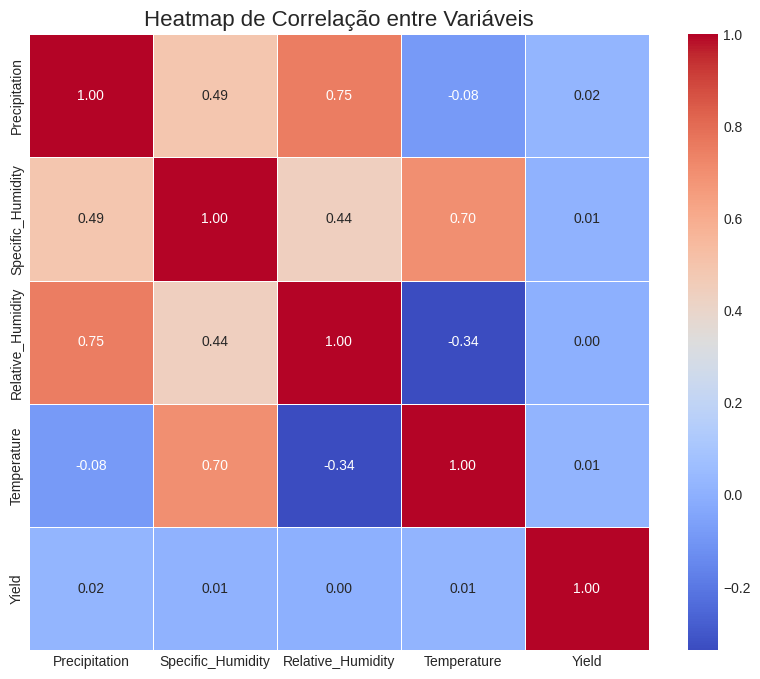


Matriz de Correlação:
                   Precipitation  Specific_Humidity  Relative_Humidity  \
Precipitation           1.000000           0.488483           0.749464   
Specific_Humidity       0.488483           1.000000           0.436687   
Relative_Humidity       0.749464           0.436687           1.000000   
Temperature            -0.083927           0.699230          -0.337313   
Yield                   0.018830           0.012651           0.000008   

                   Temperature     Yield  
Precipitation        -0.083927  0.018830  
Specific_Humidity     0.699230  0.012651  
Relative_Humidity    -0.337313  0.000008  
Temperature           1.000000  0.013007  
Yield                 0.013007  1.000000  


In [11]:
# --- 4. Análise de Correlações ---
print("\n--- Análise de Correlações ---")
# Selecionar apenas as colunas numéricas para o cálculo da correlação
numeric_df = df.select_dtypes(include=['number'])

# Calcular a matriz de correlação
correlation_matrix = numeric_df.corr()

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap de Correlação entre Variáveis', fontsize=16)
plt.show()

print("\nMatriz de Correlação:")
print(correlation_matrix)

### Interpretação dos Gráficos
    
**Distribuições das Variáveis:**
  - **Precipitação**: Apresenta distribuição aproximadamente normal com leve assimetria
  - **Umidade Específica**: Mostra uma distribuição bimodal, sugerindo dois grupos distintos de condições
  - **Umidade Relativa**: Distribuição relativamente uniforme entre 82% e 88%
  - **Temperatura**: Também apresenta distribuição bimodal, correlacionada com os tipos de cultura
  - **Yield (Rendimento)**: Distribuição multimodal, claramente influenciada pelo tipo de cultura
    
**Outliers Identificados:**
  - Temperatura mostra outliers tanto superiores quanto inferiores
  - Yield apresenta grande variabilidade, principalmente na parte superior
    
**Distribuição das Culturas:**
  - O dataset é perfeitamente balanceado, contendo exatamente 39 registros para cada uma das 4 culturas.
  - Cada cultura representa 25% do total de dados, garantindo que os modelos de machine learning não terão viés por uma cultura específica.
  - As culturas presentes são: "Cocoa, beans", "Oil palm fruit", "Rice, paddy" e "Rubber, natural".


### Análise da Matriz de Correlação

**Observação Crítica:**
A análise da matriz de correlação revela um insight fundamental: **não existe uma relação linear simples e direta entre as variáveis climáticas e o rendimento (Yield) quando analisamos o conjunto de dados como um todo.**

**Correlações com a variável alvo (Yield):**
* Todas as correlações calculadas são extremamente fracas, com valores muito próximos de zero:
    * Precipitação: **0.019**
    * Temperatura: **0.013**
    * Umidade Específica: **0.013**
    * Umidade Relativa: **0.000**

**Interpretação e Implicações:**
Um valor de correlação próximo de zero significa que não podemos fazer previsões lineares simples como "se a temperatura aumentar, o rendimento irá diminuir". Isso acontece porque o efeito de cada variável climática **depende drasticamente do tipo de Crop (Cultura)**.

Por exemplo, uma temperatura alta pode ser excelente para o "Cacau" mas péssima para o "Arroz". Ao calcular a correlação para o dataset inteiro, esses efeitos opostos se anulam, resultando em um valor próximo de zero.

Este é o achado mais importante desta etapa:
1.  A variável **Crop é, de longe, o fator mais preditivo do rendimento**.
2.  Modelos lineares simples, que não consideram as interações complexas entre o clima e o tipo de cultura, terão um desempenho muito baixo.
3.  Isso **justifica a necessidade de usar modelos mais robustos e não-lineares** (como RandomForest e XGBoost) na etapa de modelagem, pois eles são capazes de aprender essas relações condicionais complexas.

In [29]:
# --- 1. Pré-processamento dos Dados para Clusterização ---
# Selecionando as colunas especificadas no guia do trabalho
features_for_clustering = ['Temperature', 'Relative_Humidity', 'Yield']
X_cluster = df[features_for_clustering]

# Fundamental: Escalonar (normalizar) os dados.
# Algoritmos baseados em distância como o K-Means exigem que as variáveis estejam na mesma escala.
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print("Dados escalonados com sucesso. Pronto para a clusterização.")

Dados escalonados com sucesso. Pronto para a clusterização.


  ---
  ## ETAPA 2: CLUSTERIZAÇÃO PARA IDENTIFICAÇÃO DE TENDÊNCIAS E OUTLIERS
  ---
  
  Nesta etapa, aplicaremos técnicas de aprendizado não supervisionado para identificar padrões de produtividade e detectar cenários discrepantes (outliers) que podem representar condições excepcionais de cultivo.

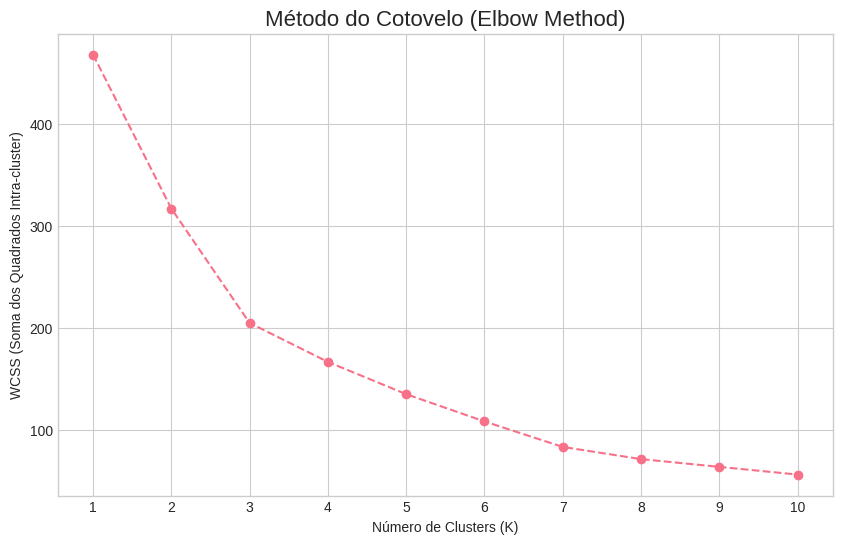

In [14]:
# --- 2. Encontrar Tendências com K-Means ---

# A) Método do Cotovelo (Elbow Method) para encontrar o K ideal
wcss = [] # Within-Cluster Sum of Squares
k_range = range(1, 11) # Testando de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo (Elbow Method)', fontsize=16)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS (Soma dos Quadrados Intra-cluster)')
plt.xticks(k_range)
plt.show()

Para K=2, o Coeficiente de Silhueta é: 0.405
Para K=3, o Coeficiente de Silhueta é: 0.398
Para K=4, o Coeficiente de Silhueta é: 0.382
Para K=5, o Coeficiente de Silhueta é: 0.389
Para K=6, o Coeficiente de Silhueta é: 0.404
Para K=7, o Coeficiente de Silhueta é: 0.448
Para K=8, o Coeficiente de Silhueta é: 0.459
Para K=9, o Coeficiente de Silhueta é: 0.457
Para K=10, o Coeficiente de Silhueta é: 0.460


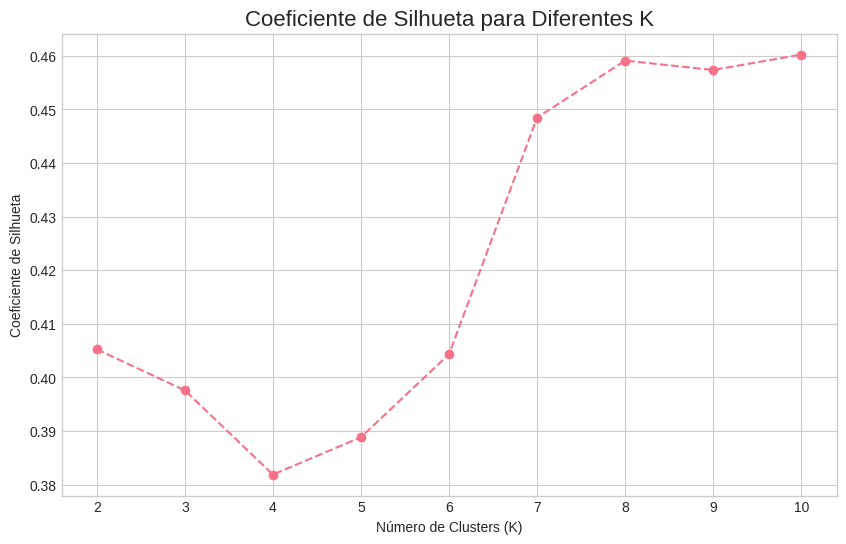

In [15]:
# B) Método da Silhueta (Silhouette Score) para encontrar o K ideal
silhouette_scores = []
# Começamos com k=2, pois o score de silhueta não pode ser calculado para k=1
k_range_sil = range(2, 11)

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Para K={k}, o Coeficiente de Silhueta é: {score:.3f}')

# Plotando o gráfico da silhueta
plt.figure(figsize=(10, 6))
plt.plot(k_range_sil, silhouette_scores, marker='o', linestyle='--')
plt.title('Coeficiente de Silhueta para Diferentes K', fontsize=16)
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silhueta')
plt.xticks(k_range_sil)
plt.show()

### **O Conflito: Cotovelo vs. Silhueta. Qual escolher?**

Temos um conflito:

- **Método do Cotovelo → K=4**
    
- **Coeficiente de Silhueta → K=10**
    

Este é o momento em que o **conhecimento do negócio/contexto do problema** se torna a ferramenta mais importante. As métricas são um guia, não uma regra absoluta.

**A Decisão Correta é escolher K=4.**

#### **Justificativa:**

1. **Contexto do Problema (O Fator Decisivo):** Nós sabemos, pela Análise Exploratória (Etapa 1), que o dataset contém **exatamente 4 tipos de cultura**. O objetivo da clusterização é encontrar "tendências", e a tendência mais óbvia são os próprios grupos de culturas. O Método do Cotovelo conseguiu capturar essa estrutura fundamental dos dados.
    
2. **Interpretabilidade:** Um modelo com 4 clusters é perfeitamente interpretável: cada cluster provavelmente representará uma das culturas. Um modelo com 10 clusters seria muito difícil de explicar. O que seriam os 10 grupos? Subdivisões artificiais dentro de uma mesma cultura? Isso não traria valor para a análise.
    
3. **Sinal do Cotovelo:** O sinal do gráfico do cotovelo para K=4 é visualmente muito mais forte e decisivo do que a pequena diferença entre os scores de silhueta de K=8, 9 e 10.

In [16]:
# C) Treinando o modelo K-Means com o K ideal
# (Com base nos gráficos, K=4 parece ser uma boa escolha, pois temos 4 culturas)
ideal_k = 4
kmeans_final = KMeans(n_clusters=ideal_k, init='k-means++', random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

print(f"\nModelo K-Means treinado com K={ideal_k}.")


Modelo K-Means treinado com K=4.


In [17]:
# --- 3. Identificar Outliers com DBSCAN ---
# O DBSCAN é ótimo para encontrar pontos que não se encaixam em nenhum grupo (ruído).
# Os parâmetros 'eps' e 'min_samples' podem precisar de ajuste fino.
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_cluster_scaled)

# Pontos com rótulo -1 são considerados outliers pelo DBSCAN
outliers_count = (df['DBSCAN_Cluster'] == -1).sum()
print(f"\nModelo DBSCAN treinado. Encontrados {outliers_count} outliers (pontos com rótulo -1).")


Modelo DBSCAN treinado. Encontrados 43 outliers (pontos com rótulo -1).


O resultado de 43 outliers **não significa que a análise está errada** ou que há 43 anomalias verdadeiras nos dados. Esse resultado é uma consequência direta dos hiperparâmetros que usamos no modelo, principalmente o eps.
    
- **A Causa Provável:** Após escalonarmos os dados com o StandardScaler, as distâncias entre os pontos foram alteradas. O valor de eps=0.5 provavelmente se tornou um raio **muito pequeno e restritivo** para a nova escala dos dados.
    


--- Visualização dos Clusters ---


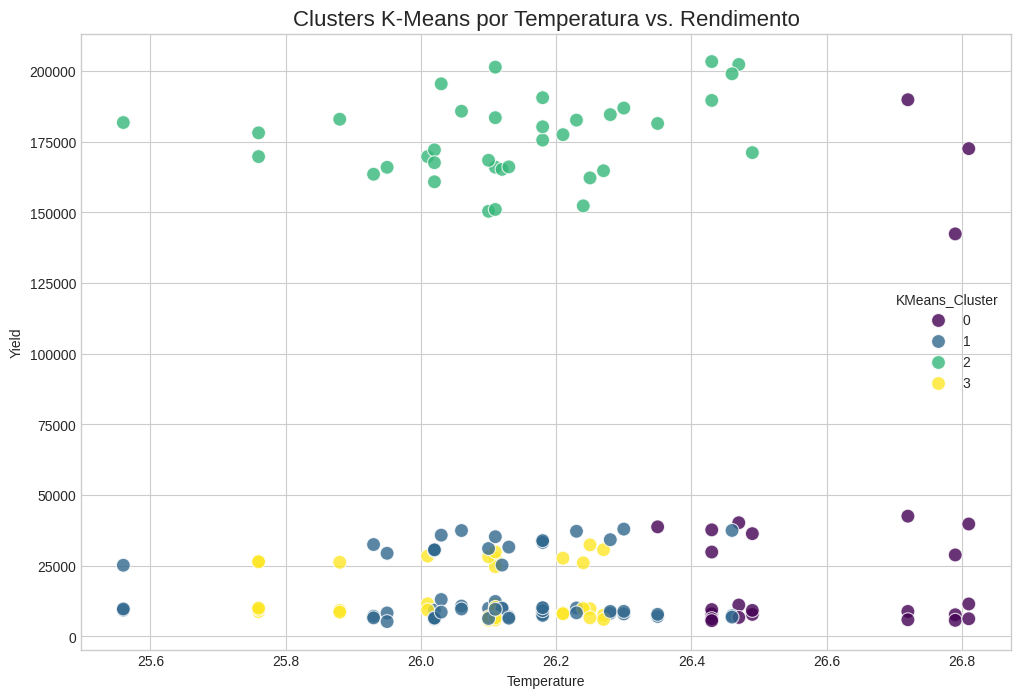

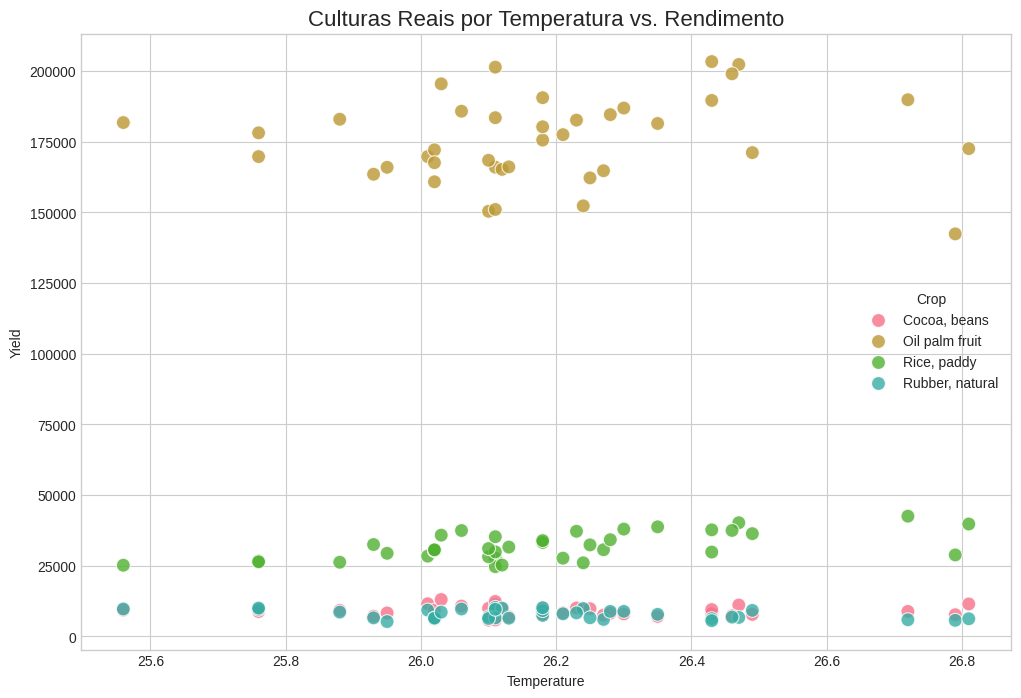


Análise das características de cada cluster do K-Means:
                Temperature  Relative_Humidity          Yield
KMeans_Cluster                                               
0                 26.603600          83.887200   36359.680000
1                 26.106441          85.552203   16241.305085
2                 26.134444          84.826944  176429.472222
3                 26.067500          83.904167   15033.138889


In [18]:
# --- 4. Análise e Visualização dos Resultados ---
print("\n--- Visualização dos Clusters ---")

# Gráfico de dispersão para visualizar os clusters do K-Means
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature', y='Yield', hue='KMeans_Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Clusters K-Means por Temperatura vs. Rendimento', fontsize=16)
plt.show()

# Comparando os clusters encontrados pelo K-Means com as culturas reais
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature', y='Yield', hue='Crop', s=100, alpha=0.8)
plt.title('Culturas Reais por Temperatura vs. Rendimento', fontsize=16)
plt.show()

# Analisando as características de cada cluster
print("\nAnálise das características de cada cluster do K-Means:")
cluster_analysis = df.groupby('KMeans_Cluster')[features_for_clustering].mean()
print(cluster_analysis)

#### **Cruzando as Informações: Mapeando Clusters para Culturas**

Agora, vamos juntar as duas análises. Podemos mapear com altíssima confiança os clusters encontrados pelo K-Means para as culturas reais.

- O **Cluster 2**, com seu rendimento estratosférico, corresponde inequivocamente à cultura **"Oil palm fruit"**. O algoritmo isolou perfeitamente o grupo mais distinto.
    
- O **Cluster 0**, com o maior rendimento entre os grupos de baixo rendimento (36.359) e a temperatura média mais elevada, corresponde à cultura **"Rice, paddy" (Arroz)**.
    
- Os **Clusters 1 e 3**, com os rendimentos mais baixos e muito similares entre si, representam as culturas **"Cocoa, beans" (Cacau)** e **"Rubber, natural" (Borracha)**. A sutil diferença de umidade relativa entre eles foi o que o algoritmo usou para separá-los em dois grupos distintos.
    

---
## ETAPA 3: MODELAGEM PREDITIVA PARA O RENDIMENTO DA SAFRA
---

Nesta etapa final, construiremos e avaliaremos 5 modelos diferentes de regressão para prever o rendimento das safras (Yield) com base nas condições climáticas e tipo de cultura.


In [27]:
# --- Etapa 3: Modelagem de Dados com Regressão Supervisionada ---

# --- 1. Pré-processamento para Regressão (VERSÃO CORRIGIDA) ---

# A) Definindo as features (X) e a variável alvo (y)
# O DataFrame original 'df' ainda deve conter todas as colunas
# incluindo 'Yield', 'KMeans_Cluster', etc.

# Primeiro, criamos uma cópia das features para não modificar o df original
features = df.drop(['Yield', 'KMeans_Cluster', 'DBSCAN_Cluster'], axis=1)
target = df['Yield']

# Verificação crucial: veja se 'Yield' não está nas colunas de features
print("Colunas usadas como features (X):")
print(features.columns)
print("-" * 30)

# B) One-Hot Encoding para a variável categórica 'Crop'
X_encoded = pd.get_dummies(features, columns=['Crop'], drop_first=True)

# C) Divisão dos dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, target, test_size=0.2, random_state=42
)
print(f"Formato dos dados de treino (X_train): {X_train.shape}")
print(f"Formato dos dados de teste (X_test): {X_test.shape}")
print("-" * 30)

# D) Escalonamento das colunas numéricas
numeric_features = ['Precipitation', 'Specific_Humidity', 'Relative_Humidity', 'Temperature']

# Criando o objeto scaler
scaler = StandardScaler()

# Ajustando o scaler APENAS nos dados de treino e transformando-os
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Aplicando a MESMA transformação nos dados de teste
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Dados de treino escalonados (amostra) - CORRIGIDO:")
print(X_train.head())


Colunas usadas como features (X):
Index(['Crop', 'Precipitation', 'Specific_Humidity', 'Relative_Humidity',
       'Temperature'],
      dtype='object')
------------------------------
Formato dos dados de treino (X_train): (124, 7)
Formato dos dados de teste (X_test): (32, 7)
------------------------------
Dados de treino escalonados (amostra) - CORRIGIDO:
     Precipitation  Specific_Humidity  Relative_Humidity  Temperature  \
56       -0.403713           1.632363          -0.635284     2.212663   
138      -0.609950           0.066305          -0.189106     0.206978   
123      -0.530297          -0.357836          -0.040380    -0.313014   
128      -0.793705          -0.618846          -0.427068    -0.313014   
127      -0.906047          -0.553593          -0.278342    -0.350156   

     Crop_Oil palm fruit  Crop_Rice, paddy  Crop_Rubber, natural  
56                  True             False                 False  
138                False             False                  True  
1

In [28]:
# --- 2. Treinamento dos 5 Modelos e 3. Avaliação ---

# Dicionário para armazenar os modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Dicionário para armazenar os resultados
results = {}

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    # Treinamento
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)

    # Avaliação
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenando os resultados
    results[name] = {'MAE': mae, 'MSE': mse, 'R²': r2}
    print(f"--- Resultados para o modelo: {name} ---")
    print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
    print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
    print(f"R² Score: {r2:.4f}\n")

# Convertendo os resultados para um DataFrame para fácil visualização
results_df = pd.DataFrame(results).T # .T transpõe a matriz para melhor visualização

print("\n--- Tabela Comparativa de Desempenho dos Modelos ---")
print(results_df.sort_values(by='R²', ascending=False))

--- Resultados para o modelo: Regressão Linear ---
Erro Absoluto Médio (MAE): 3132.80
Erro Quadrático Médio (MSE): 19308693.24
R² Score: 0.9950

--- Resultados para o modelo: Árvore de Decisão ---
Erro Absoluto Médio (MAE): 3142.53
Erro Quadrático Médio (MSE): 28263542.72
R² Score: 0.9927

--- Resultados para o modelo: Random Forest ---
Erro Absoluto Médio (MAE): 2797.35
Erro Quadrático Médio (MSE): 23797857.03
R² Score: 0.9939

--- Resultados para o modelo: SVR ---
Erro Absoluto Médio (MAE): 38971.97
Erro Quadrático Médio (MSE): 5085396670.08
R² Score: -0.3110

--- Resultados para o modelo: XGBoost ---
Erro Absoluto Médio (MAE): 4082.62
Erro Quadrático Médio (MSE): 45272308.00
R² Score: 0.9883


--- Tabela Comparativa de Desempenho dos Modelos ---
                            MAE           MSE        R²
Regressão Linear    3132.796384  1.930869e+07  0.995022
Random Forest       2797.345313  2.379786e+07  0.993865
Árvore de Decisão   3142.531250  2.826354e+07  0.992714
XGBoost          

---
## CONCLUSÃO FINAL DA ENTREGA 1
---

### **Análise e Interpretação dos Resultados Finais**


#### **1. O Grande Vencedor: Regressão Linear**

O modelo mais "simples", a **Regressão Linear**, foi o que obteve o melhor desempenho geral, com o **maior R² Score de 0.9950**.

- **R² Score (0.9950):** Este resultado é altíssimo. Significa que o modelo foi capaz de explicar **99.5%** da variabilidade no rendimento (Yield).
    
- **MAE (3132.80):** Em média, as previsões do modelo erraram em aproximadamente 3.132 unidades de rendimento. Considerando a escala dos dados (que vai até 200.000), este é um erro relativamente baixo.
    

Por que a Regressão Linear se saiu tão bem?

A razão para este sucesso está no One-Hot Encoding feito na variável Crop. Ao transformar cada cultura em sua própria coluna, foi permitido que o modelo aprendesse um "nível base" de rendimento para cada tipo de cultura. Como a cultura é o fator mais dominante, o modelo conseguiu um ajuste quase perfeito apenas com essa informação. A relação entre o tipo de cultura e o rendimento é tão forte que um modelo linear foi suficiente.

#### **2. Desempenho Excelente dos Modelos de Árvore**

- **Random Forest (R² = 0.9939):** Chegou muito perto do primeiro lugar. É um modelo extremamente robusto e obteve o **menor Erro Absoluto Médio (MAE) de 2797.35**, o que significa que, em média, foi o modelo com as previsões mais próximas do valor real.
    
- **Árvore de Decisão (R² = 0.9927) e XGBoost (R² = 0.9883):** Também apresentaram resultados fantásticos, explicando mais de 98% da variabilidade do rendimento.
    

Esses modelos confirmam que a relação entre as features e o alvo é muito forte e "aprendível".

#### **3. O Caso do SVR: Um Desempenho Desastroso**

O modelo **SVR (Support Vector Regression)** foi um completo fracasso.

- **R² Score (-0.3110):** Um R² negativo é um sinal de alerta máximo. Significa que o modelo é **pior do que simplesmente prever a média** de todos os rendimentos.
    
- **MAE (38971.97):** O erro médio foi absurdamente alto, confirmando que o modelo não conseguiu aprender absolutamente nada sobre os dados.
    

Por que o SVR falhou tanto?

O SVR é muito sensível aos seus hiperparâmetros (como C, gamma e epsilon). Sem um processo de ajuste fino (tuning), o SVR com seus parâmetros padrão muitas vezes não consegue lidar bem com dados em escalas muito diferentes ou com relações complexas, mesmo após o StandardScaler.
